Index(['step', 'time', 'temp', 'press', 'pe', 'ke', 'etotal'], dtype='object')
Index(['step', 'time', 'temp', 'press', 'pe', 'ke', 'etotal'], dtype='object')


/tmp/ipykernel_157998/2996270470.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_small_T_damp = pd.read_csv('therm_sw_nvt_small.csv', delim_whitespace=True)
/tmp/ipykernel_157998/2996270470.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_big_T_damp = pd.read_csv('therm_sw_nvt_big.csv', delim_whitespace=True)


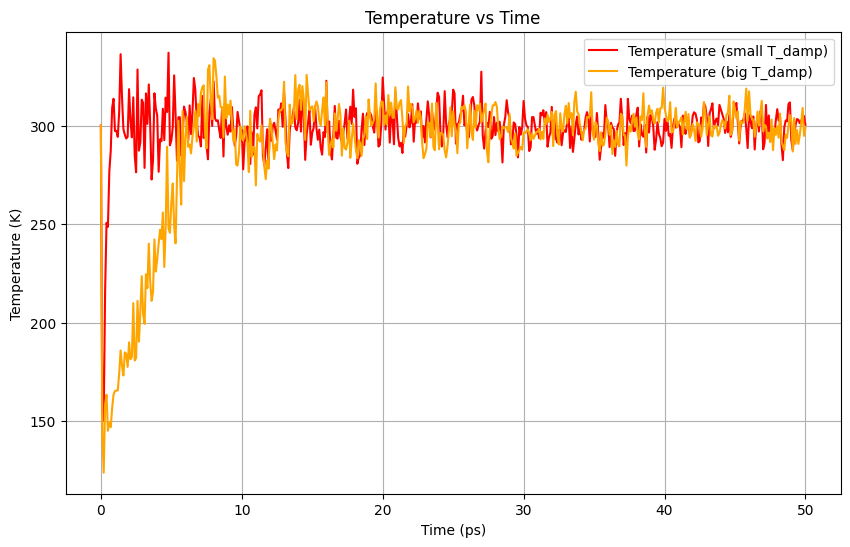

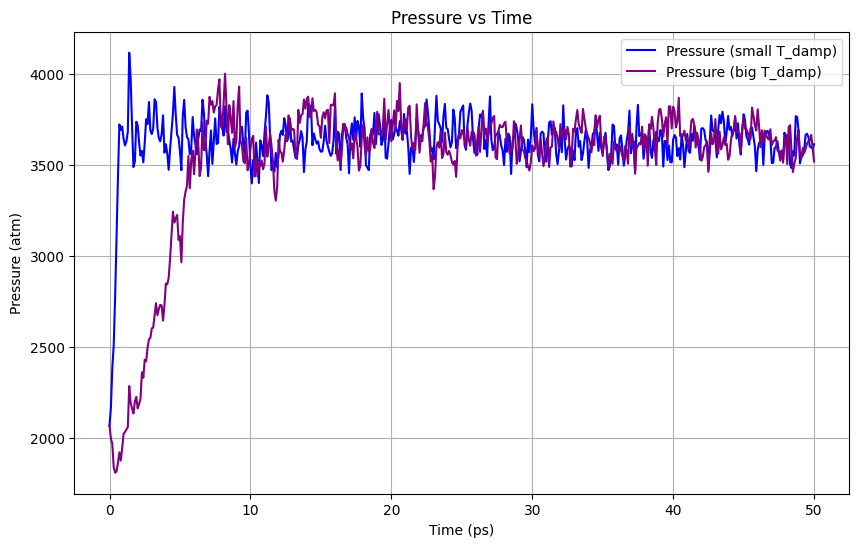

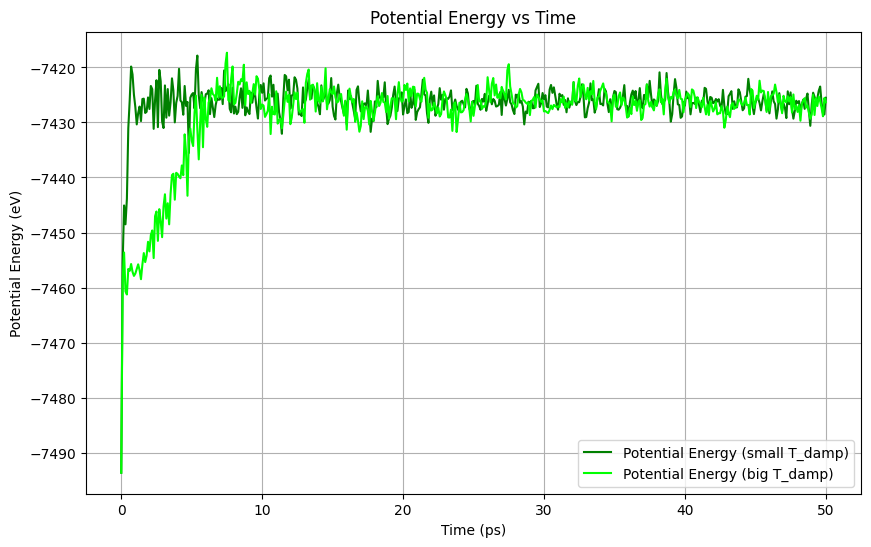

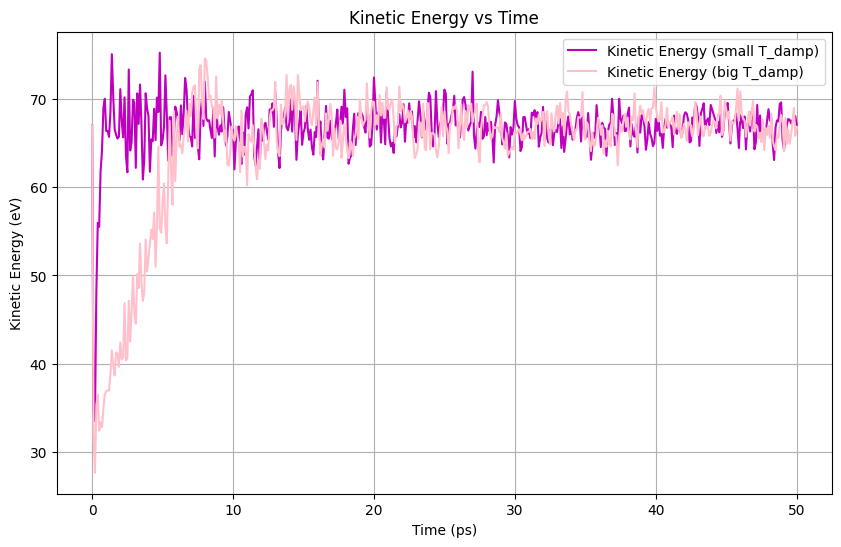

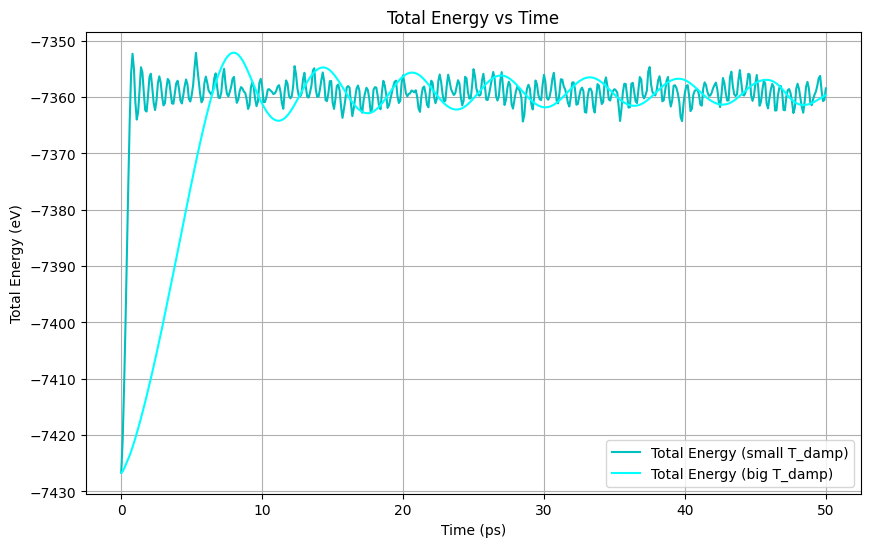

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_small_T_damp = pd.read_csv('therm_sw_nvt_small.csv', delim_whitespace=True)
data_big_T_damp = pd.read_csv('therm_sw_nvt_big.csv', delim_whitespace=True)

print(data_small_T_damp.columns)
print(data_big_T_damp.columns)

# Extract relevant columns for small T_damp
time_small = data_small_T_damp['time']
temperature_small = data_small_T_damp['temp']
pressure_small = data_small_T_damp['press']
potential_energy_small = data_small_T_damp['pe']
kinetic_energy_small = data_small_T_damp['ke']
total_energy_small = data_small_T_damp['etotal']

time_big = data_big_T_damp['time']
temperature_big = data_big_T_damp['temp']
pressure_big = data_big_T_damp['press']
potential_energy_big = data_big_T_damp['pe']
kinetic_energy_big = data_big_T_damp['ke']
total_energy_big = data_big_T_damp['etotal']

plt.figure(figsize=(10, 6))
plt.plot(time_small, temperature_small, label='Temperature (small T_damp)', color='r')
plt.plot(time_big, temperature_big, label='Temperature (big T_damp)', color='orange')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs Time')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_small, pressure_small, label='Pressure (small T_damp)', color='b')
plt.plot(time_big, pressure_big, label='Pressure (big T_damp)', color='purple')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (atm)')
plt.title('Pressure vs Time')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_small, potential_energy_small, label='Potential Energy (small T_damp)', color='g')
plt.plot(time_big, potential_energy_big, label='Potential Energy (big T_damp)', color='lime')
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (eV)')
plt.title('Potential Energy vs Time')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_small, kinetic_energy_small, label='Kinetic Energy (small T_damp)', color='m')
plt.plot(time_big, kinetic_energy_big, label='Kinetic Energy (big T_damp)', color='pink')
plt.xlabel('Time (ps)')
plt.ylabel('Kinetic Energy (eV)')
plt.title('Kinetic Energy vs Time')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_small, total_energy_small, label='Total Energy (small T_damp)', color='c')
plt.plot(time_big, total_energy_big, label='Total Energy (big T_damp)', color='cyan')
plt.xlabel('Time (ps)')
plt.ylabel('Total Energy (eV)')
plt.title('Total Energy vs Time')
plt.grid(True)
plt.legend()
plt.show()


Conclusion: Tdamp specifies the time constant for temperature relaxation. A short Tdamp means that the simulation is more sensitive to temperature change, leading to abrupt change. From the log file log.lammps, a short T damp also result in faster simulation than that of big T_damp.
Concerning big T_damp, It results in smoother simulation. In the rest of the notebook, the T_damp would be set to 1.0

/tmp/ipykernel_157998/1533194653.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_nvt_small = pd.read_csv('therm_sw_nvt_big.csv', delim_whitespace=True)
/tmp/ipykernel_157998/1533194653.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_langevin = pd.read_csv('therm_sw_nve_langevin.csv', delim_whitespace=True)
/tmp/ipykernel_157998/1533194653.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_berendsen = pd.read_csv('therm_sw_nve_berendsen.csv', delim_whitespace=True)


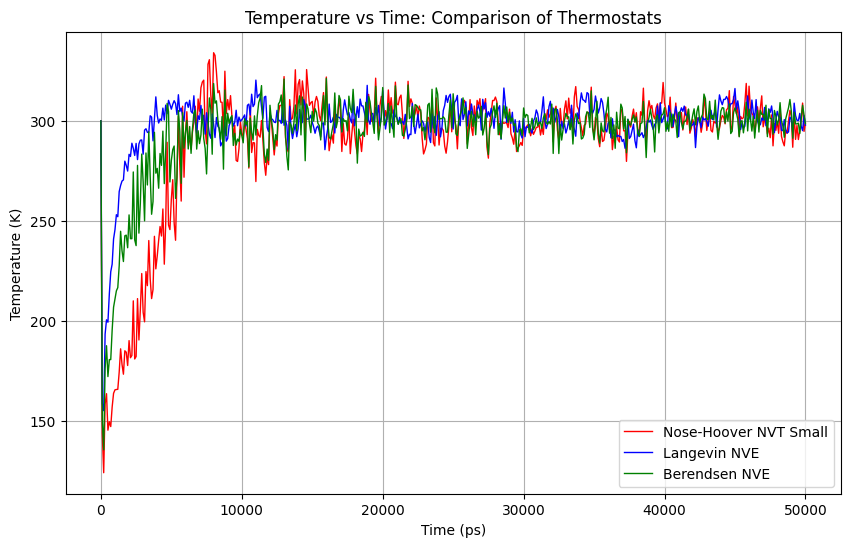

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV files
data_nvt_small = pd.read_csv('therm_sw_nvt_big.csv', delim_whitespace=True)
data_langevin = pd.read_csv('therm_sw_nve_langevin.csv', delim_whitespace=True)
data_berendsen = pd.read_csv('therm_sw_nve_berendsen.csv', delim_whitespace=True)

time_nvt_small = data_nvt_small['step']
temperature_nvt_small = data_nvt_small['temp']

time_langevin = data_langevin['step']
temperature_langevin = data_langevin['temp']

time_berendsen = data_berendsen['step']
temperature_berendsen = data_berendsen['temp']

plt.figure(figsize=(10, 6))
plt.plot(time_nvt_small, temperature_nvt_small, label='Nose-Hoover NVT Small', color='r', linewidth=1)
plt.plot(time_langevin, temperature_langevin, label='Langevin NVE', color='b', linewidth=1)
plt.plot(time_berendsen, temperature_berendsen, label='Berendsen NVE', color='g', linewidth=1)

plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs Time: Comparison of Thermostats')
plt.grid(True)
plt.legend()

plt.show()


Conclusion: As expected, langevin have the fastest performance (quickly reach equilibrium), while Nose-Hoover is the slowest.

Concerning the behaviour of each simulations, Berendsen and  Nose-Hoover have many jumps in temprature in the very first step of the simulation, while langevin are more consistent overtime. However, Berendsen and Nose-Hoover converge in the end of the simulation while Langevin keeps fluctuating.